<a href="https://colab.research.google.com/github/mayraberrones94/FCFM/blob/master/Clase_Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos

La clase pasada vimos los pasos básicos necesarios para la limpieza de datos. Como mencionabamos, estos pasos no son necesario llevarlos a cabo en orden. 



*   Remover los datos inecesarios
*   Remover los duplicados
* Arreglar errores de estructura
* Decidir que hacer con los datos nulos
* Hacer un filtro de Outliers
* Hacer una validación de los datos

En primera instancia vamos a seguir estos pasos tomando en cuenta que tenemos un conocimiento general de los datos con los que estamos trabajando. 


Despues utilizaremos herramientas de aprendizaje de máquina no supervisado para tipos de datos que no se tiene conocimiento previo.



Como en el ejemplo pasado, es necesario que conectemos nuestra carpeta de Drive hayamos descargado previamente las bases de datos con las que queremos trabajar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando librerías necesarias

La práctica pasada solo mencionamos que existen algunas librerías que nos van a ayudar en el proceso de limpieza de datos. 

`numpy`: Esta librería de python es básica para cualquier tipo de computación matemática que podamos ocupar. (objeto de matriz multidimensional, varios objetos derivados (como matrices y matrices enmascaradas) y una variedad de rutinas para operaciones rápidas en matrices, incluidas operaciones matemáticas, lógicas, manipulación de formas, clasificación, selección, E/S, transformadas discretas de Fourier, álgebra lineal básica , operaciones estadísticas básicas, simulación aleatoria).

* [Página web](https://numpy.org/doc/stable/user/whatisnumpy.html)
* [Ejemplos](https://cs231n.github.io/python-numpy-tutorial/)

`pandas`: Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.

* [Página web](https://pandas.pydata.org/docs/user_guide/10min.html)
* [Ejemplos](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)


Herramientas de visualización (`matplotlib`, `seaborn`, `plotly`): 

* [Pagina web matplotlib](https://matplotlib.org/)
* [Pagina web seaborn](https://seaborn.pydata.org/)
* [Pagina web plotly](https://plotly.com/python/)
* [Ejemplos](https://www.python-graph-gallery.com/)



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
import os


## Cargar los data sets

Para esta práctica podemos seguir trabajando con los datasets que trabajamos la clase pasada, agregando los siguientes como ejemplos de análisis exploratorio para datos no conocidos:



In [ ]:
netflix=pd.read_csv('/content/drive/MyDrive/Datasets/Datos_curso/netflix_titles.csv')

## Exploración descriptiva

Como comentabamos la clase pasada, el primer paso de el analisis de datos es determinar cual es el objetivo principal. Ya que tneemos esto en mente empezamos a recolectar la información que nos ayudará a construir un modelo, pero antes de poder iniciar con la construcción del modelo o calculo importante de las variables, tenemos que realizar una exploración descriptiva.

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Veamos ahora el tipo de datos que contiene cada columna. Esto puede ayudarnos a revisar si existe alguna inconsistencia en cuanto a alguna variable numerica que se este tomando en cuenta como un valor de texto o viceversa. 

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.isna().sum().sort_values()

show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
dtype: int64

Hasta aquí vemos que la mayoria de las columnas tienen tipo objeto, son en total 12 columnas con 8,807 filas, y vemos que 6 de las columnas no contienen datos nulos mientas que las otras 6 si. 3 de estas tienen una cantidad despreciable de datos nulos (podemos eliminar las filas sin comprometer los datos) sin embargo las otras 3 columnas tienen una cantidad significativa de datos nulos.



In [ ]:
title_list = netflix['title'].tolist()


In [ ]:
from bs4 import BeautifulSoup
import requests
import re


In [ ]:
!pip install IMDbPY

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 KB 6.7 MB/s eta 0:00:00


In [ ]:

# importing the module
import imdb
from imdb import Cinemagoer
  
# creating instance of IMDb
ia = Cinemagoer()
directors = []

for title in range(0, 10):
  name = title_list[title]
  search = ia.search_movie(name)
  director = ia.search_person(name)
  print('=====-=====-=====-=====-=====')
  print(search[0]['title'])
  for i in range(len(director)):
    if i == 0:
      print(director[i]['name'])



=====-=====-=====-=====-=====
Dick Johnson Is Dead
=====-=====-=====-=====-=====
Blood & Water
Bonita Pietila
=====-=====-=====-=====-=====
Ganglands
Connie Angland
=====-=====-=====-=====-=====
Jailbirds New Orleans
=====-=====-=====-=====-=====
Kota Factory
Soca Factory
=====-=====-=====-=====-=====
Midnight Mass
Midnight Mass
=====-=====-=====-=====-=====
My Little Pony: A New Generation
=====-=====-=====-=====-=====
Sankofa
AJ Sankofa
=====-=====-=====-=====-=====
The Great British Baking Show
British Public The Great
=====-=====-=====-=====-=====
The Starling
Radicals The Starling


In [ ]:
director_list = netflix['director'].tolist()

In [ ]:
from math import nan
from pandas.core.api import isnull

from imdb import IMDbDataAccessError


dir_nulos = []
for inde in range(len(title_list)):
  if director_list[inde] is np.nan:
    try:
      name = title_list[inde]
      search = ia.search_movie(name)
      director = ia.search_person(name) 
      print(director)
      for i in range(len(director)):
        if i == 0:
          dir_nulos.append(director[i]['name'])
    except ValueError:
      dir_nulos.append(0)
  else:
    dir_nulos.append(0)
    

[<Person id:0682862[http] name:_Bonita Pietila_>, <Person id:0454068[http] name:_Kimson Albert_>]
[]
[<Person id:8569000[http] name:_Soca Factory_>, <Person id:11065275[http] name:_Tortilla Factory_>, <Person id:3839458[http] name:_Diana Factory_>]
[]
[]
[]
[]
[<Person id:1603772[http] name:_Jaguar Wright_>, <Person id:14437332[http] name:_Jaguar Sannappa Sandalwood_>, <Person id:10449102[http] name:_Jaguar Sannappa_>, <Person id:12783556[http] name:_Jaguar French_>, <Person id:9655989[http] name:_Jaguar Lim_>, <Person id:0415640[http] name:_Jaguar_>, <Person id:5472393[http] name:_Goddess Jaguar Domina_>, <Person id:5496508[http] name:_Jaguar_>, <Person id:3840629[http] name:_Jaguar Thangam_>, <Person id:2761317[http] name:_Jaguar Yokota_>, <Person id:1557539[http] name:_Jiakun Zhang_>, <Person id:0415644[http] name:_Zona Jaguar_>, <Person id:12631948[http] name:_Jaguar_>, <Person id:8451192[http] name:_Jaguar_>, <Person id:14188531[http] name:_Jaguar Lee_>, <Person id:10469661[http] 

KeyboardInterrupt: ignored

In [ ]:
print(dir_nulos)

[0, 'Bonita Pietila', 0, 'Soca Factory', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Jaguar Wright', 0, 0, 0, 0, 0, 0, 0, 0, 0, 'My Education', 'Lydia Ellery', 0, 0, 'Angry Birds Kiss', 0, 'Chhota Bhai Pahelwan', 0, 0, 0, 0, 0, 0, 0, 0, 'C.A. Neto & Gypsy Castle Band', 'Dharma Kshetra', 0, 0, 0, 0, 'Abigail Disney', 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Festis Festis The Numberblocks And Htf Fan 2005', 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Lucifer Valentine', 0, 0, 'Kaniehtiio Horn', 0, 'Lester Speight', 0, 0, 'Spirits in the Night', 0, 0, 'The Circle', 0, 'Sakari Kuosmanen', 'Above & Beyond', 'Leslie Berger', 0, 0, 0, 'Sarah Gallagher', 0, 'Edward Bunker', 0, 'South Sea Aqua Club Dive Team', 'José Ángel de la Casa', 0, 'Adiza Shardow', 0, 0, 0, 0, 0, 0, 0, 0, 'Ric Newth', 'Perico el del Lunar', 0, 'Luvkush Gupta', 'Penguins The Little', 'Leonard Nimoy', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Davide Catena', 'Mike Hopkins', 0, 0, 0, 0, 0, 'Kaia Gerber', 0, 0, 0, 0, 'Madeline Zima',

#### Print the name of columns

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Check for NULL Values

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Check unique values

In [ ]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

#### Check for Duplicate values

In [ ]:
netflix.duplicated().sum()

0

No duplicate values present.

#### Make a copy of the dataset

In [ ]:
df = netflix.copy()

In [ ]:
df.shape

(8807, 12)

#### Drop NULL values

In [ ]:
df=df.dropna()
df.shape

(5332, 12)

#### Print first 10 values

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...


#### Convert Date Time format

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,2021,9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,2021,9
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,20,2021,9
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,19,2021,9
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",19,2021,9
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,16,2021,9
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,16,2021,9


# Data Visualization

### Type: Movie and TV Shows

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type')

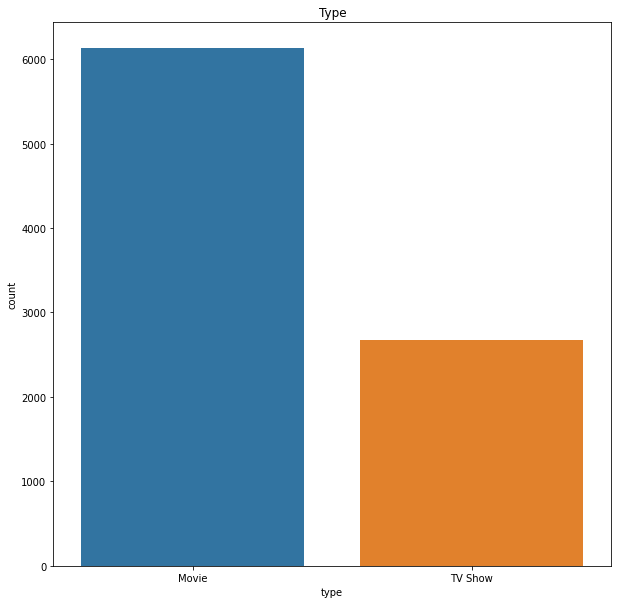

In [ ]:
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

### Rating of shows and movies

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating')

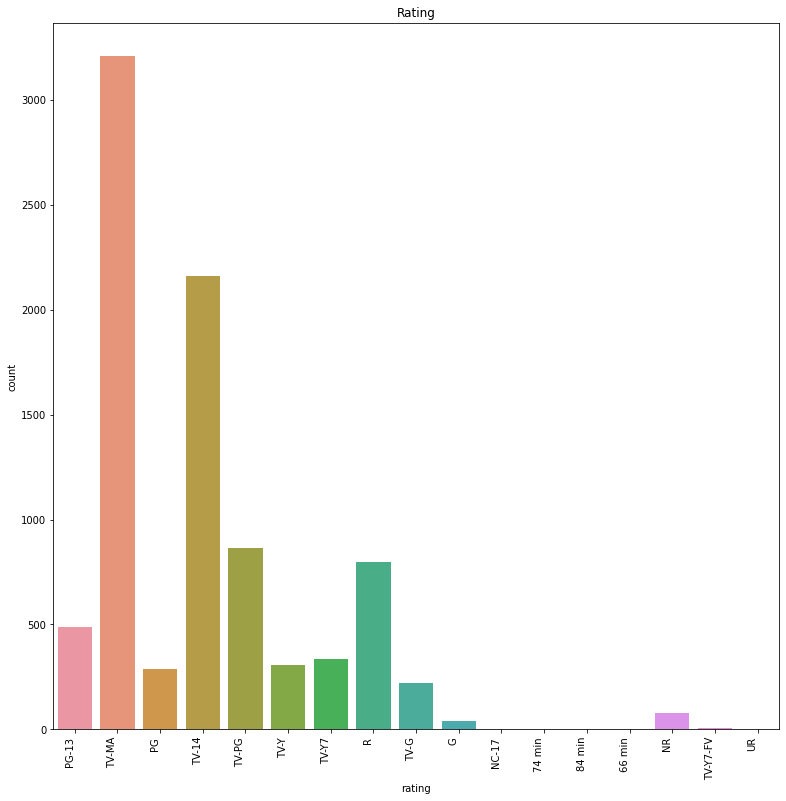

In [ ]:
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

### Relation between Type and Rating

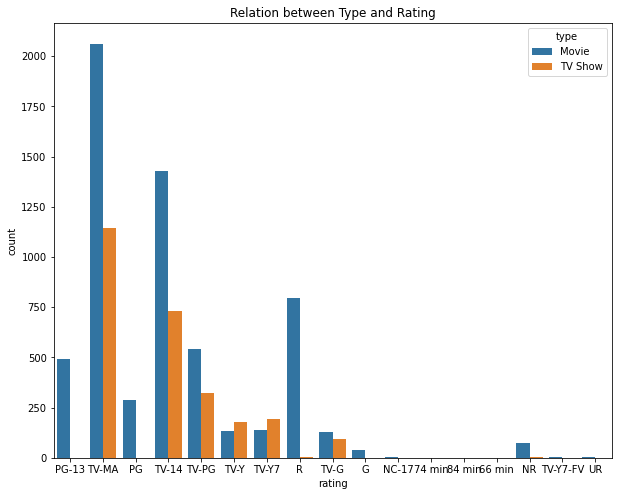

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

### Pie-chart for the Type: Movie and TV Shows

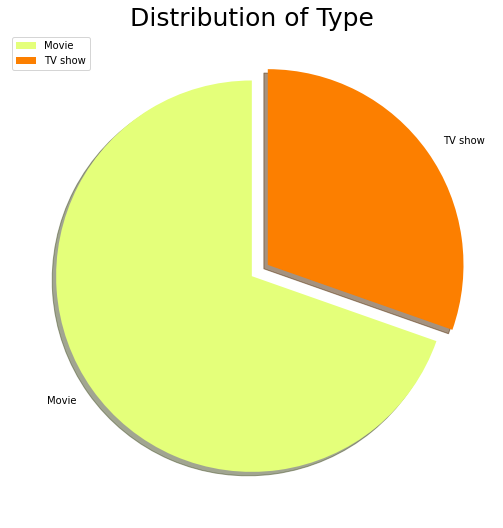

In [ ]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

### Pie-chart for Rating

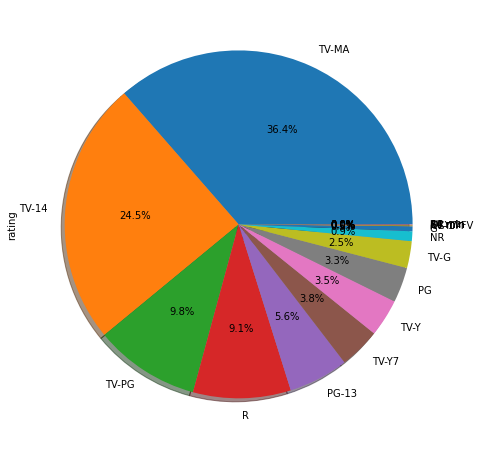

In [ ]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# WordCloud

In [ ]:
from wordcloud import WordCloud

## Country

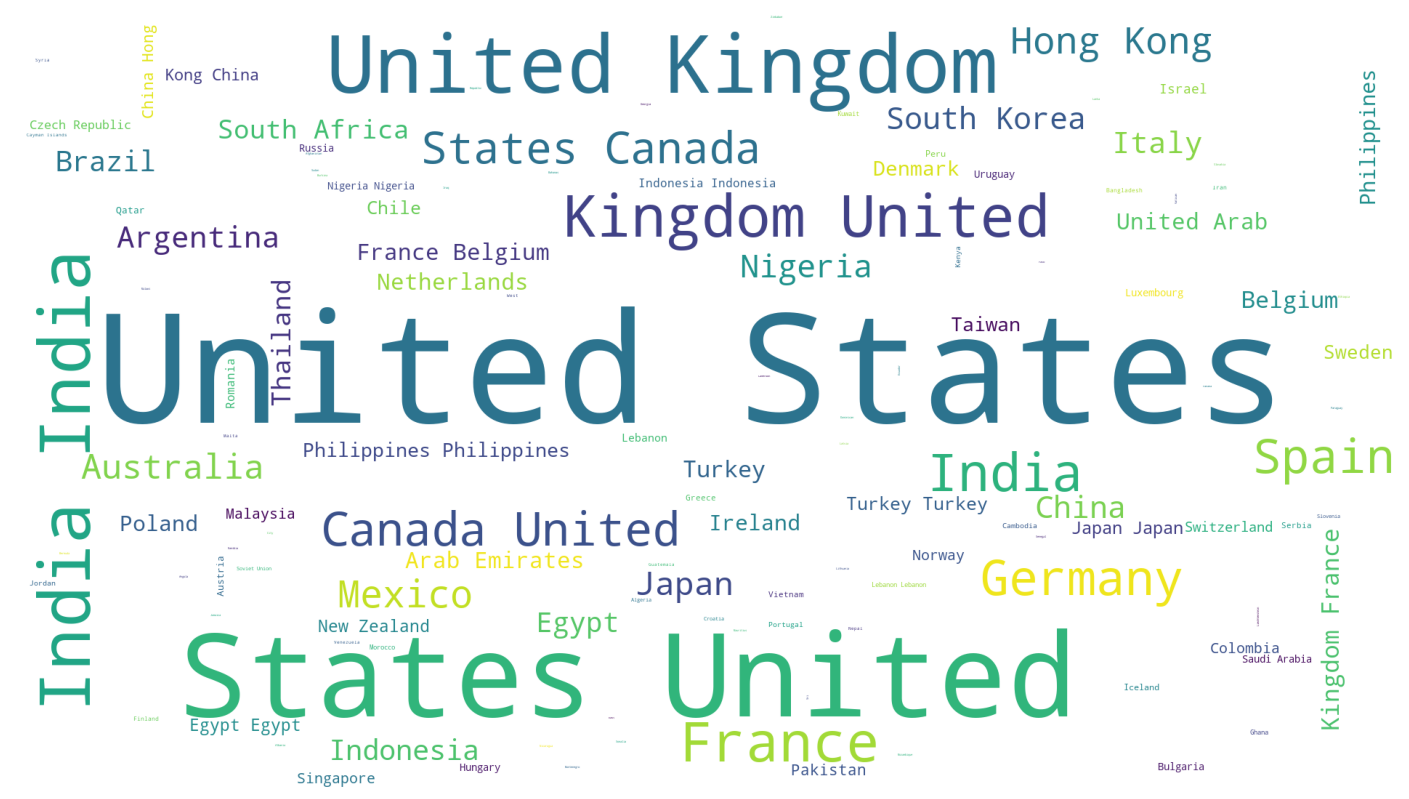

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

## Cast in the Shows

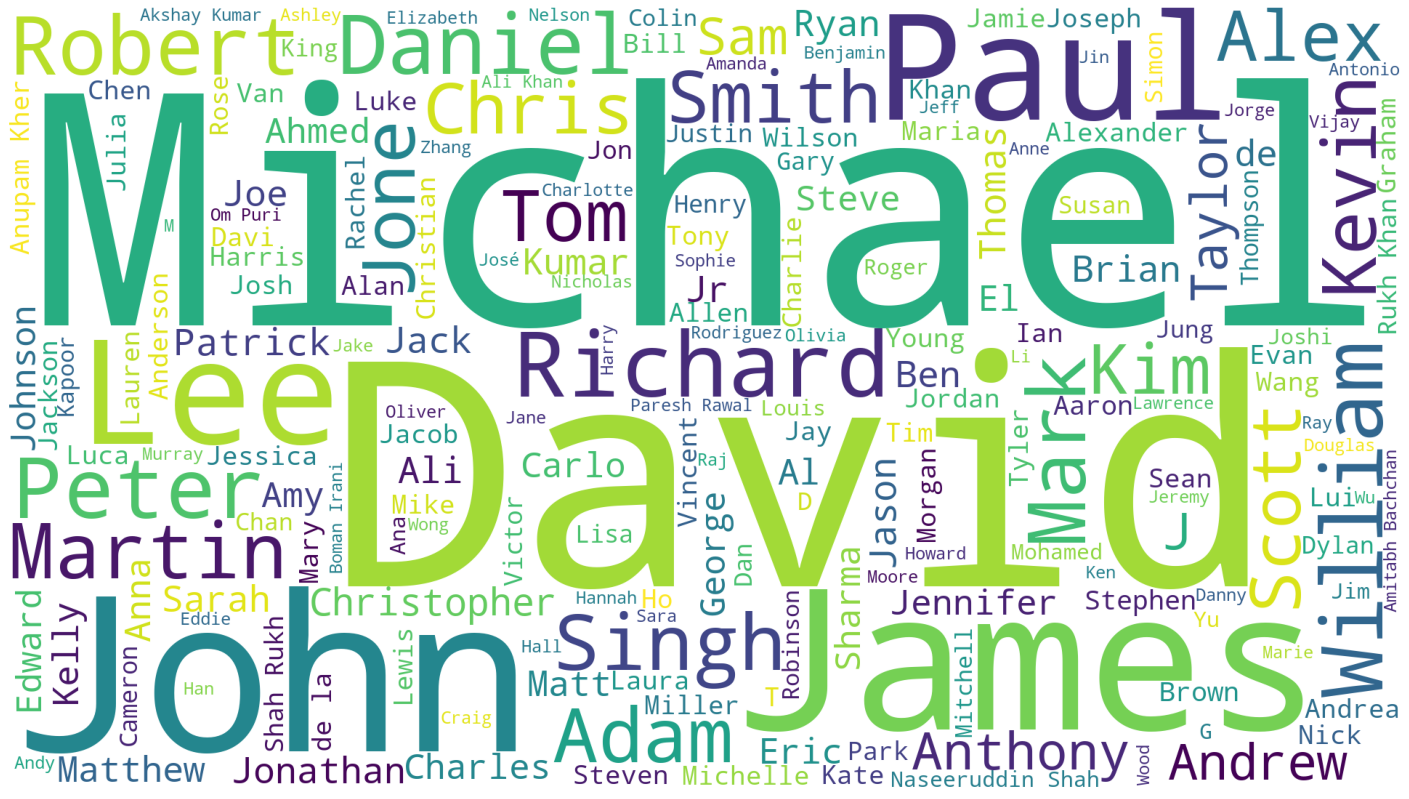

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

## Directors

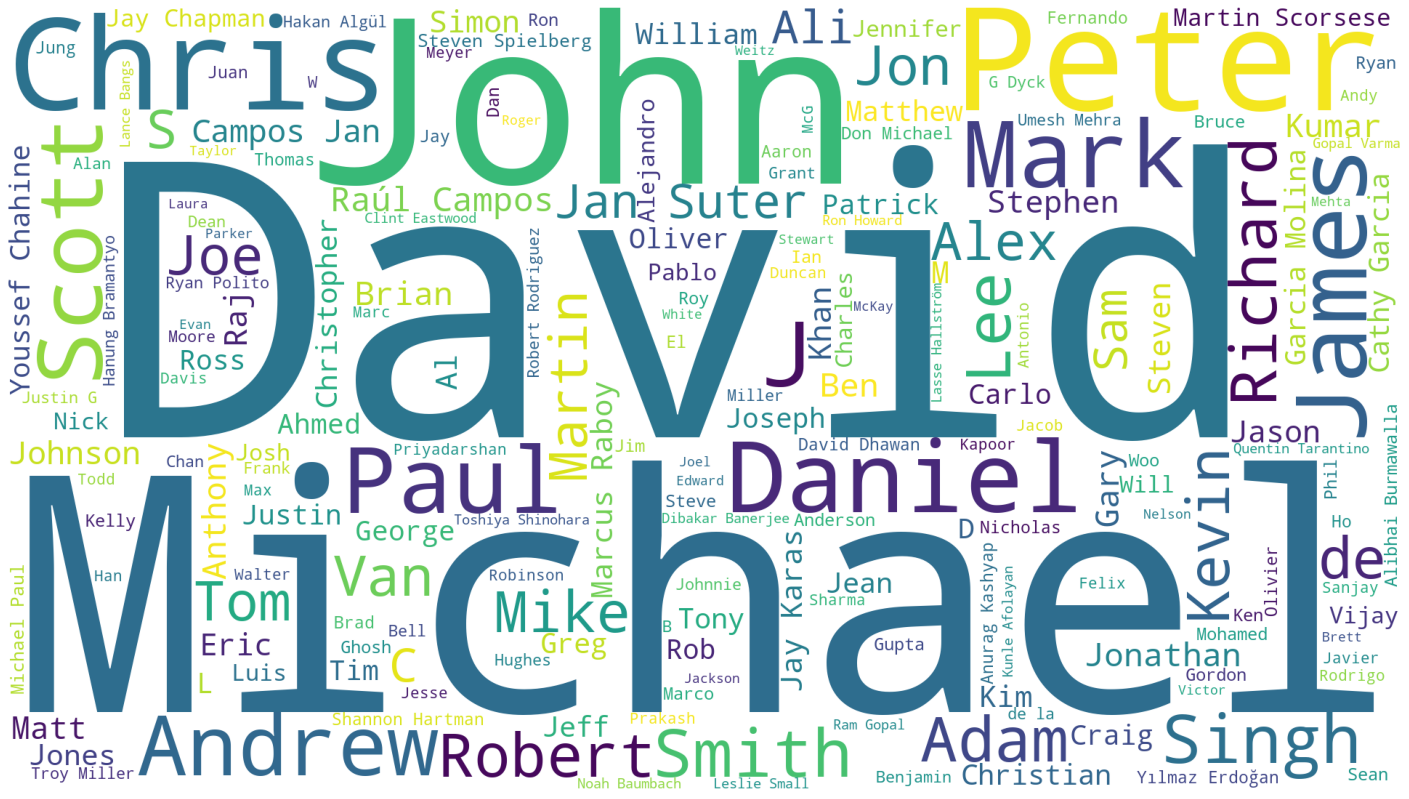

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

## Categories

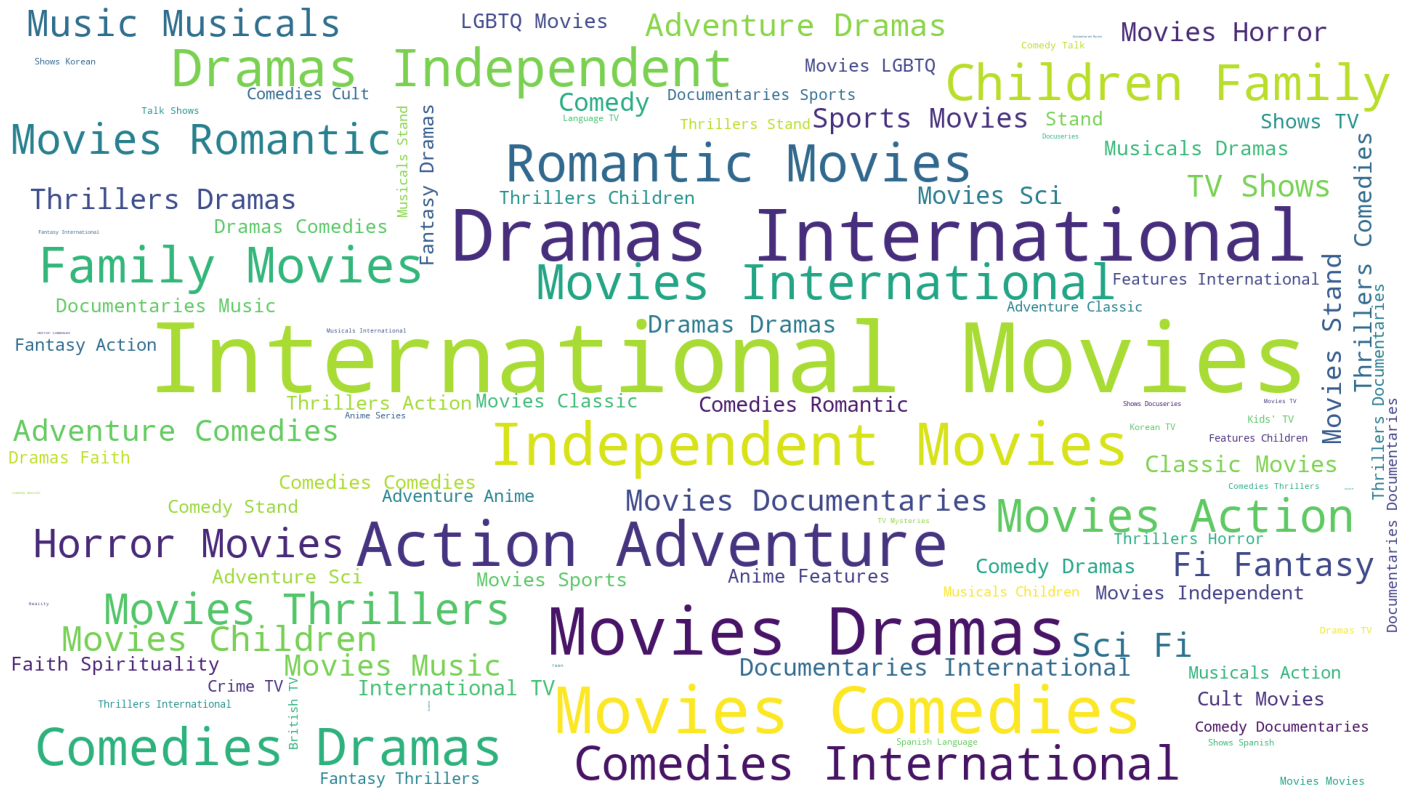

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()